In [17]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [18]:
data = pd.read_excel("iot_data.xlsx")

In [19]:
data.head()

,id,date,time,value
0,1,2023-02-09,12:39:20,9.0
1,2,2023-02-09,13:22:23,10.0
2,3,2023-02-09,13:49:31,12.0
3,4,2023-02-09,16:35:50,10.0
4,5,2023-02-11,13:40:18,21.4


In [20]:
data.describe()

,id,value
count,13434.000000,13434.000000
mean,6717.499404,15.958196
std,3878.205936,3.141393
min,1.000000,9.000000
25%,3359.250000,13.600000
50%,6717.500000,15.700000
75%,10075.750000,18.200000
max,13434.000000,25.800000


In [21]:
data.columns =['id', 'date', 'time', 'value']

In [22]:
print(data['date'])

0       2023-02-09
1       2023-02-09
2       2023-02-09
3       2023-02-09
4       2023-02-11
           ...    
13429   2023-02-14
13430   2023-02-14
13431   2023-02-14
13432   2023-02-14
13433   2023-02-14
Name: date, Length: 13434, dtype: datetime64[ns]


In [23]:
data.head()

,id,date,time,value
0,1,2023-02-09,12:39:20,9.0
1,2,2023-02-09,13:22:23,10.0
2,3,2023-02-09,13:49:31,12.0
3,4,2023-02-09,16:35:50,10.0
4,5,2023-02-11,13:40:18,21.4


In [24]:
data['date'] = pd.to_datetime(data['date']).dt.date

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13434 entries, 0 to 13433
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      13434 non-null  int64  
 1   date    13434 non-null  object 
 2   time    13434 non-null  object 
 3   value   13434 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 419.9+ KB


In [26]:
data.describe()

,id,value
count,13434.000000,13434.000000
mean,6717.499404,15.958196
std,3878.205936,3.141393
min,1.000000,9.000000
25%,3359.250000,13.600000
50%,6717.500000,15.700000
75%,10075.750000,18.200000
max,13434.000000,25.800000


In [27]:
data.set_index(data['time'],inplace=True)

In [28]:
data.drop('time',axis=1,inplace=True)

In [29]:
data.head()

,id,date,value
time,,,
12:39:20,1,2023-02-09,9.0
13:22:23,2,2023-02-09,10.0
13:49:31,3,2023-02-09,12.0
16:35:50,4,2023-02-09,10.0
13:40:18,5,2023-02-11,21.4


<Axes: xlabel='id'>

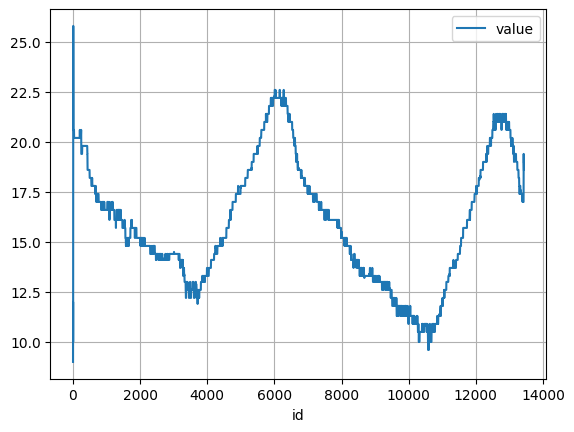

In [31]:
data.plot(grid=True,x='id',y='value',kind='line')

In [32]:
data = data.groupby('time').agg({'value': 'mean'})

In [33]:
data.head()

,value
time,
00:00:02,14.1
00:00:10,15.2
00:00:15,14.1
00:00:23,15.2
00:00:27,14.1


In [34]:
data.reset_index(inplace = True,drop = False)

In [35]:
datetime = data.copy(deep=True)

In [36]:
datetime.head()

,time,value
0,00:00:02,14.1
1,00:00:10,15.2
2,00:00:15,14.1
3,00:00:23,15.2
4,00:00:27,14.1


In [37]:
data.set_index(data['time'],inplace = True)

In [38]:
data.drop('time',axis=1,inplace=True)

In [39]:
data.head()

,value
time,
00:00:02,14.1
00:00:10,15.2
00:00:15,14.1
00:00:23,15.2
00:00:27,14.1


In [40]:
data.to_csv('temp2.csv')

In [42]:
data.reset_index(inplace = True)
data.head()

,time,value
0,00:00:02,14.1
1,00:00:10,15.2
2,00:00:15,14.1
3,00:00:23,15.2
4,00:00:27,14.1


In [53]:
time_list = [str(t) for t in data['time'].tolist()]
formatted_time_strings = [t[-8:] for t in time_list]

In [64]:
import datetime
datetime_values = pd.to_datetime(formatted_time_strings, format='%H:%M:%S')
data['hour'] = datetime_values.hour
data['minute'] = datetime_values.minute
data['second'] = datetime_values.second
data.drop('time',axis=1,inplace=True)

KeyError: "['time'] not found in axis"

In [65]:
data = data[['hour','minute','second','value']]

In [66]:
data.head()

,hour,minute,second,value
0,0,0,2,14.1
1,0,0,10,15.2
2,0,0,15,14.1
3,0,0,23,15.2
4,0,0,27,14.1


In [67]:
target = np.array(data['value'])
data.drop('value',axis=1,inplace=True)
feature_list = list(target)
features = np.array(data)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
xtrain,xtest,ytrain,ytest = train_test_split(features,target,test_size = 0.25,random_state = 42)

In [71]:
xtrain.shape

(9672, 3)

In [72]:
from  sklearn.ensemble import RandomForestRegressor

In [73]:
rf = RandomForestRegressor(n_estimators = 1000)

In [74]:
rf.fit(xtrain,ytrain);

In [77]:
rf.predict(xtest)

array([10.81645, 13.2338 , 14.8968 , ..., 14.00305, 14.1656 , 18.0862 ])

In [80]:
rf.score(xtest,ytest)

0.8346667130570319

In [92]:
rf.predict(np.array([13,  18, 34]).reshape(1, -1))

array([19.1724])

In [88]:
xtest


array([[ 7,  3, 34],
       [ 8, 28, 40],
       [ 0,  0, 53],
       ...,
       [ 1, 20, 36],
       [ 2, 28, 41],
       [18, 38, 41]], dtype=int64)